# Sales Prediction Using Python

Task: Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv("Advertising.csv")

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Display the last few rows of the DataFrame
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# Get the dimensions
df.shape

(200, 5)

In [6]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Generate a summary statistics report for the DataFrame
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# drop unncessary columns 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Visualization

In [10]:
columns = ['TV', 'Radio', 'Newspaper']
colors = ['red', 'green', 'blue']

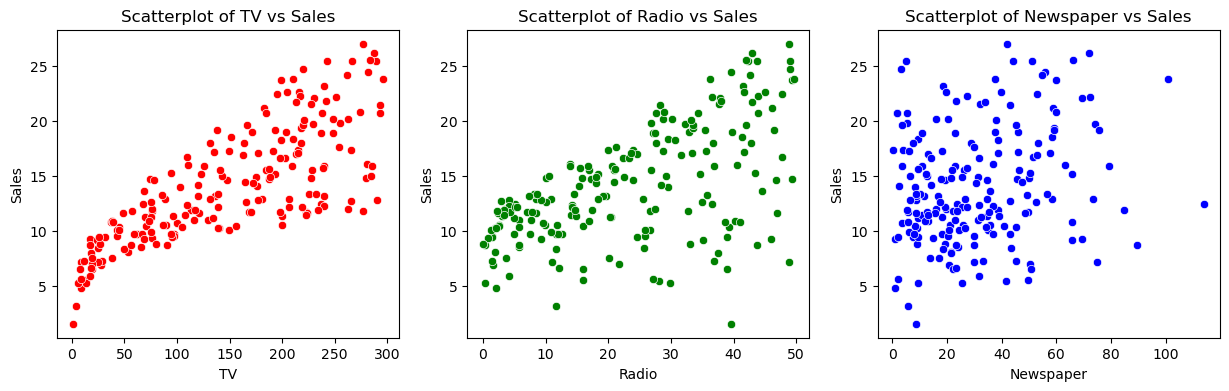

In [11]:
plt.figure(figsize=(15, 4))
# enumerate is used to iterate through both 'columns' and 'colors'
for i, column in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=column, y='Sales', color=colors[i])
    plt.title(f'Scatterplot of {column} vs Sales')
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

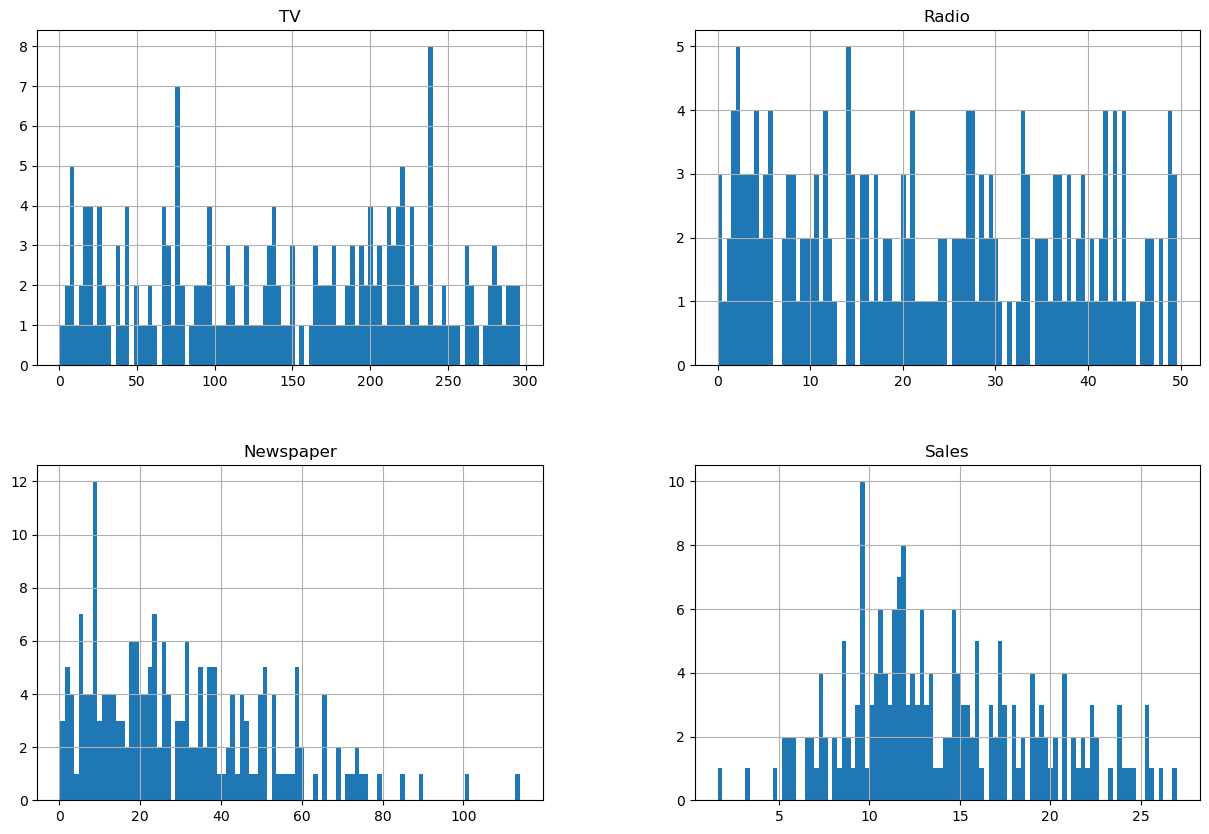

In [12]:
df.hist(bins=100, figsize=(15,10))

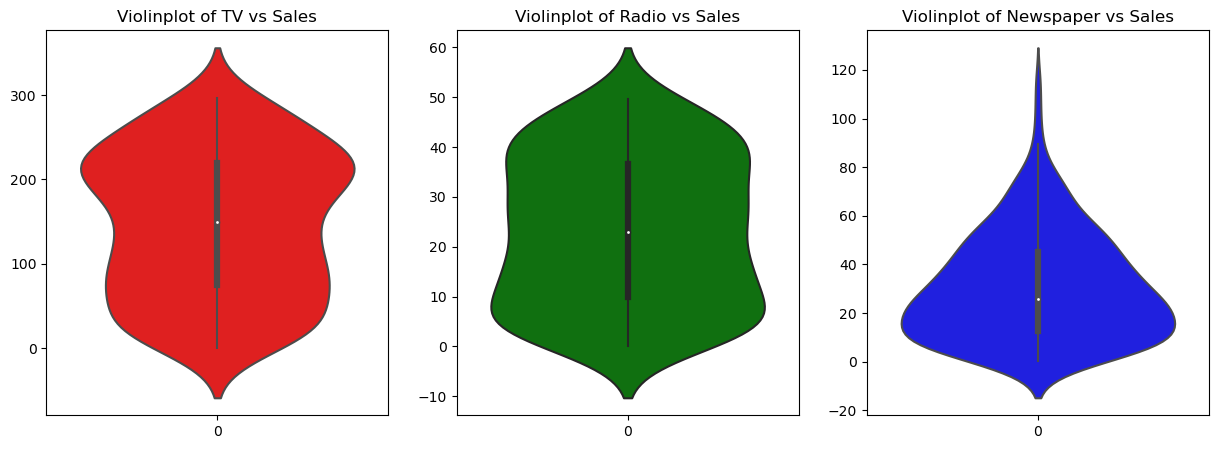

In [49]:
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.violinplot(df[columns[i]], color=colors[i])
    plt.title(f'Violinplot of {columns[i]} vs Sales')
plt.show()

Text(0.5, 1.0, 'Heatmap for Correlations')

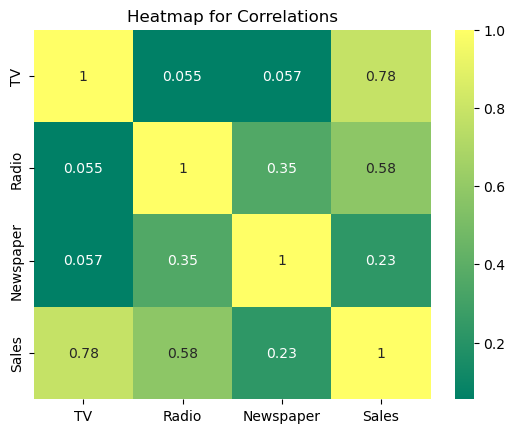

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Heatmap for Correlations')

## Model Building: Decision Tree Regressor

In [15]:
x = df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [18]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# Hyperparameter Optimization using GridSearchCV
from sklearn.tree import DecisionTreeRegressor
DTC = DecisionTreeRegressor() 

In [20]:
#hyperparameters
parameters = {'criterion': ['squared_error', 'absolute_error'], 'splitter':['best','random'], 'max_depth' : [1,2,3,4,5,6],'min_samples_split':[1,2,3,4,5]} 

In [21]:
#initializing model
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(DTC, parameters, cv = 5, n_jobs = -1, verbose = 1)

In [22]:
#fitting training data
gd.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [23]:
gd.best_score_ #Score of the model

0.9352505128961894

In [24]:
gd.best_params_ #Best parameters

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_split': 3,
 'splitter': 'best'}

In [25]:
np.random.seed(43)

In [26]:
# Fitting best parameters into decision tree model
DTC = DecisionTreeRegressor(criterion='absolute_error', max_depth=6, min_samples_split= 4, splitter = 'best')
DTC.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_split=4)

In [27]:
# Prediction
ypred = DTC.predict(x_test)

In [28]:
# Evaluation of the model using sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mean_squared_error(y_test, ypred)

0.7859999999999996

In [29]:
mean_absolute_error(y_test, ypred)

0.6849999999999998

In [30]:
r2_score(y_test, ypred)

0.9726950363849062